# Modeling and Simulation in Python

HIV Model

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Code from previous chapters

`make_system`, `plot_results`, and `calc_total_infected` are unchanged.

In [2]:
def make_system(beta, gamma, tau, pi, alpha, delta, sigma, mu, rho):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(R = 200, E = 0, L = 0, V = .0000004)

    t0 = 1
    dt = .001
    t_end = 120000/dt
    

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma, tau=tau, pi=pi, alpha=alpha, delta=delta, sigma=sigma, mu=mu, rho=rho, dt=dt)

In [3]:
def plot_results(R, E, L, V):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    i = t0
    
    for t in linspace(t0, t_end, dt*1000000):
        frame.row[i+1] = update_func(frame.row[i], dt, system)
        i = i + 1
        
    return frame

In [5]:
# Original

def update_func(state, dt, system):
    """Update the SIR model.
    
    state: State (s, i, r)
    t: time
    system: System object
    
    returns: State (sir)
    """
    
    unpack(system)
    R, E, L, V = state
    
    dRdt = gamma * tau - mu * R - beta * R * V
    dVdt = pi * E - sigma * V
    dEdt = (1 - rho) * beta * R * V + alpha * L - delta * E
    dLdt = rho * beta * R * V - mu * L - alpha * L
    
   
    r = 0
    e = 0
    l = 0
    v = 0
    
    r += R + dRdt * dt
    e += E + dEdt * dt
    l += L + dLdt * dt
    v += V + dVdt * dt
    
    return State(R=r, E=e, L=l, V=v)

In [6]:
print (make_system(.00027, 1.36, .2, 100, .036, .33, 2, .00136, .1))
x =run_simulation(make_system(.00027, 1.36, .2, 100, .036, .33, 2, .00136, .1), update_func)

init     R    2.000000e+02
E    0.000000e+00
L    0.000...
t0                                                       1
t_end                                              1.2e+08
beta                                               0.00027
gamma                                                 1.36
tau                                                    0.2
pi                                                     100
alpha                                                0.036
delta                                                 0.33
sigma                                                    2
mu                                                 0.00136
rho                                                    0.1
dt                                                   0.001
dtype: object


,R,E,L,V
1,200.0,0.000000e+00,0.000000e+00,4.000000e-07
2,200.0,1.944000e-11,2.160000e-12,3.992000e-07
3,200.0,3.883478e-11,4.315599e-12,3.984035e-07
4,200.0,5.818453e-11,6.466817e-12,3.976106e-07
5,200.0,7.748944e-11,8.613673e-12,3.968212e-07
6,200.0,9.674969e-11,1.075619e-11,3.960353e-07
7,200.0,1.159655e-10,1.289437e-11,3.952529e-07
8,200.0,1.351370e-10,1.502826e-11,3.944740e-07
9,200.0,1.542643e-10,1.715786e-11,3.936986e-07
10,200.0,1.733478e-10,1.928319e-11,3.929266e-07


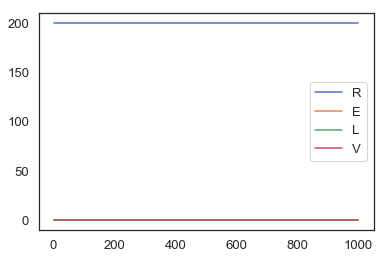

In [7]:
x.plot()

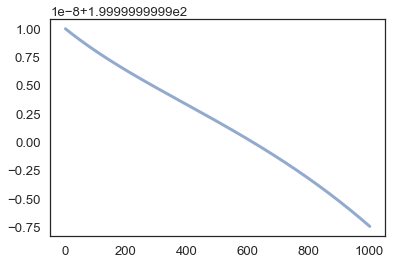

In [8]:
plot(x.index, x.R)

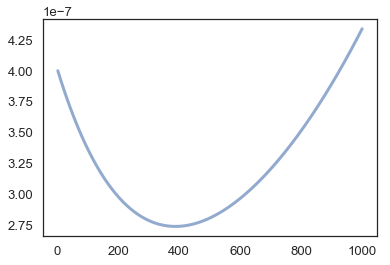

In [9]:
plot(x.index, x.V)

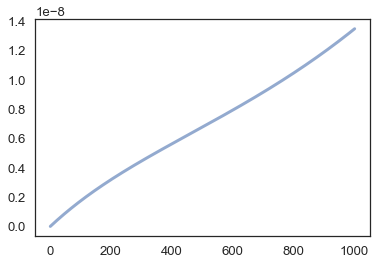

In [10]:
plot(x.index, x.E)

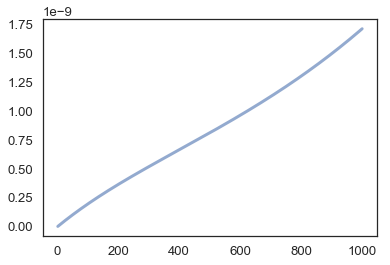

In [11]:
plot(x.index, x.L)